In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
base_dir = '/content/drive/MyDrive/pts/horse-or-human'
!ls "/content/drive/MyDrive/pts/horse-or-human"

bahan  latih  validasi


In [28]:
bahan_dir = os.path.join(base_dir, 'bahan')
train_dir = os.path.join(base_dir, 'latih')
validation_dir = os.path.join(base_dir, 'validasi')

In [29]:
humans_dir = os.path.join(bahan_dir, 'humans')
horses_dir = os.path.join(bahan_dir, 'horses')

print("Jumlah Data Train Tiap Kelas")
print('jumlah gambar humans :' ,len(os.listdir(humans_dir)))
print('jumlah gambar horses :' ,len(os.listdir(horses_dir)))

Jumlah Data Train Tiap Kelas
jumlah gambar humans : 128
jumlah gambar horses : 128


In [43]:
train_humans = os.path.join(train_dir, 'humans/')
train_horses = os.path.join(train_dir, 'horses/')

validation_humans = os.path.join(validation_dir, 'humans/')
validation_horses = os.path.join(validation_dir, 'horses/')

DATA SEY

In [31]:
import random
from shutil import copyfile

def train_val_split(source, train, val, train_ratio):
  total_size = len(os.listdir(source))
  train_size = int(total_size * train_ratio)
  val_size = total_size - train_size

  randomized = random.sample(os.listdir(source), total_size)
  train_file = randomized[0:train_size]
  val_file = randomized[train_size:total_size]

  for nama_file in train_file:
    path_file = os.path.join(source, nama_file)
    destination = os.path.join(train, nama_file)
    copyfile(path_file, destination)

  for nama_file in val_file:
    path_file = os.path.join(source, nama_file)
    destination = os.path.join(val, nama_file)
    copyfile(path_file, destination)

train_ratio = 0.9


sorce_00 = humans_dir
train_00 = train_humans
val_00 = validation_humans
train_val_split(sorce_00, train_00, val_00, train_ratio)


sorce_01 = horses_dir
train_01 = train_horses
val_01 = validation_horses
train_val_split(sorce_01, train_01, val_01, train_ratio)

In [32]:
print('jumlah gambar ALL humans :' ,len(os.listdir(humans_dir)))
print('jumlah gambar train humans :' ,len(os.listdir(train_humans)))
print('jumlah gambar val humans :' ,len(os.listdir(validation_humans)))

jumlah gambar ALL humans : 128
jumlah gambar train humans : 128
jumlah gambar val humans : 80


peroces


In [33]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

tarjet

In [34]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=128,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=128,
    class_mode='binary'
)

Found 256 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [35]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nAkurasi telah mencapai >99%!")
      self.model.stop_training = True

callbacks = myCallback()

CNN

In [36]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.3,seed=112),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dropout(0.5,seed=112),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.compile(loss='sparse_categorical_crossentropy',
                 optimizer='Adam',
                 metrics=['accuracy'])

In [38]:
for data_batch, labels_batch in train_generator:
         print('Data batch shape:', data_batch.shape)
         print('Labels batch shape:', labels_batch.shape)
         break

Data batch shape: (128, 150, 150, 3)
Labels batch shape: (128,)


In [39]:
!pip install --upgrade tensorflow

In [40]:
history = model.fit(
    train_generator,
    steps_per_epoch = 6,
    epochs = 25,
    validation_data = val_generator,
    validation_steps = 1,
    verbose = 1,
    callbacks=[callbacks]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
2/6 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.5078 - loss: 0.9221  

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


6/6 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.5026 - loss: 1.0707 - val_accuracy: 0.5156 - val_loss: 1.0850
Epoch 2/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.5124 - loss: 0.9124 - val_accuracy: 0.6484 - val_loss: 0.6897
Epoch 3/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.4779 - loss: 0.7410 - val_accuracy: 0.4844 - val_loss: 0.6914
Epoch 4/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.5000 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6830
Epoch 5/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.5339 - loss: 0.6861 - val_accuracy: 0.5703 - val_loss: 0.6767
Epoch 6/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5749 - loss: 0.6763 - val_accuracy: 0.5859 - val_loss: 0.6656
Epoch 7/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.6211 - loss: 0.6611 - val_accuracy: 0.7344 - val_loss: 0.6394
Epoch 8/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.6927 - loss: 0.6426 - val_accuracy: 0.6562 - val_loss: 0.6227
Epoch 9/25
6/6 ━━━━

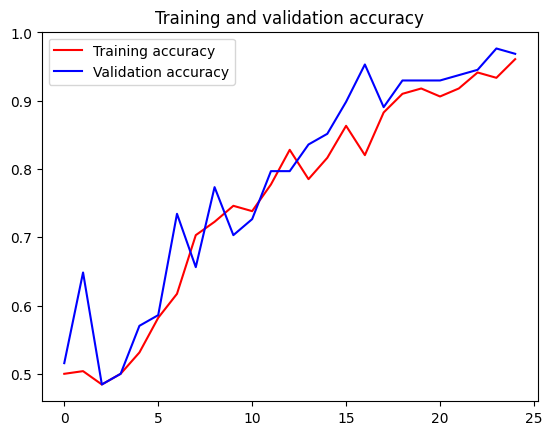

<Figure size 640x480 with 0 Axes>

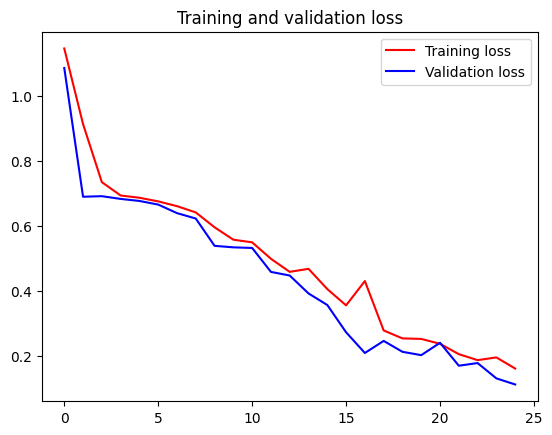

<Figure size 640x480 with 0 Axes>

In [41]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='best')
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='best')
plt.figure()
plt.show()

coba klarifikasi

Saving human01-00.png to human01-00.png


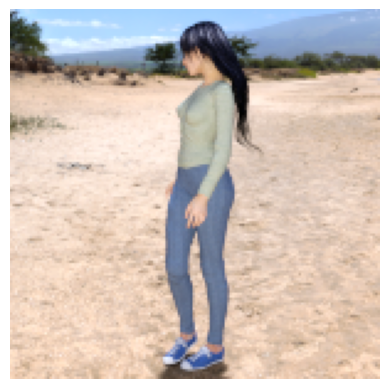

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
human01-00.png -> this image belongs to class: horses


In [44]:
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150, 150))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0

    images = np.vstack([x])
    clases = model.predict(images)

    class_list = os.listdir(train_dir)
    predicted_class = class_list[np.argmax(clases)]

    print(f"{fn} -> this image belongs to class: {predicted_class}")